# **Clasificación supervisada**
A diferencia de los problemas de regresión que devuelven variables numéricas continuas y por tanto están preparados para realizar predicciones, existe un segundo tipo de algoritmos pensados para tareas de clasificación. En otras palabras, el output de estos algoritmos o bien es una probabilidad sobre una clase o directamente un valor dentro de un conjunto finito de valores.

# **Regresión Logística**

Pensemos en un dataset que recoge condiciones médicas de diferentes pacientes. Contamos además con una columna objetivo que nos indica si el fallecimiento del paciente fue relacionado con problemas cardiacos o no. Este tipo de datos podrían ayudar a identificar condiciones asociadas a infartos u otro tipo de enfermedades cariovasculares. Nuestro objetivo sería poder clasificar cada uno de nuestros datos en dos posibles grupos (*riesgo de muerte por problemas cardiovasculares* o *sin riesgo de muerte*). La Regresión Logística, a pesar de su nombre, se utiliza en tareas de clasificación binarias como el ejemplo que acabamos de describir. El calificativo de logística proviene de la función que describe la clasificación: la *función logística*:

$$ f(x) = \frac{1}{1+e^{-x}}$$

Esta función logística convierte cualquier número entero $x$ en un valor entre $0$ y $1$, lo cual permite modelar probabilidades.
Para entender la profundidad matemática de la función logística olvidémos esta por un momento y recordemos el concepto de odds, o ratio entre la probabilidad $p$ y la probabilidad de no-$p$. Este ratio nos decía cuantas veces era más probable un evento sobre su no ocurrencia. Un ejemplo sería una transacción bancaria que es $150$ veces más probable que sea legítima que no lo sea (odd $=\frac{150}{1}$). Estos odds son muy importantes porque nos permiten describir probabilidades haciendo uso de cualquier número positivo. Así que una opción es tratar la salida de una Regresión Lineal al uso como si se tratara de un *odd* y luego convertirlo en un probabilidad sobre una de las clases. Con esto ya tendríamos un modelo de Regresión Logística para clasificación binaria.

Pero existen algunos problemas con esta solución. El primero es que el rango de valores posibles de los odds va de $0$ a infinito. Y las salidas de un Regresión Lineal pueden ser también negativas. Para resolver esto transformamos los odds en ***logits***, es decir, su logaritmo: $ln(\frac{1}{1-p})$. Estos logits pueden ser negativos, de hecho su rango abarca desde $-∞$ (probabilidad $0$ de pertenecer a una clase) hasta $+∞$ (probabilidad $1$ de pertenecer a una clase). Y no solo eso, si no que nos permite generar una simetría por la que, por ejemplo, un odds de $2$ (dos veces mayor probabilidad de ocurrencia) es un logit de $0.69$, mientras que un odds de $0.5$ (dos veces más probabilidad de ocurrencia del evento contrario) devuelve un logit de $-0.69$. Un logit de $0$ supone la misma probabilidad para ambas clases, es decir, un odds $= 1$.

<div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1FynnYHjVq0SQbtlfE_biOmmawrdZ-79a" width="500">

Este rango de los logits desde $-∞$ hasta $+∞$ nos permite tratar la salida de una Regresión Lineal como logit. Pero esto nos lleva a un nuevo problema. Y es el caso de que si quiseramos comparar los logits que devuelve nuestro modelo frente a los valores de la columna objetivo. Estos últimos habría que convertirlos igualmente en logits. Que un objeto pertenece a una clase, es equivalente a que la probabilidad de pertenencia es $1$, lo cual devuelve un logit de $+∞$. Si no perteneciese el logit sería de $-∞$. Esto hace imposible calcular las distancias entre los logits que ofrecería nuestro modelo y los logits reales, puesto que serían siempre distancias infinitas. La estrategia de mínimos cuadrados queda descartada.

La solución radica en evitar las comparaciones directas y recoger las estimaciones que nuestro modelo realiza para cada dato.


<div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1G_pqZuUvzh_fnp0ZIivBjTJ_I05sqAdr" width="400">

Y aquí entra en juego la función logística, que no es sino la inversa de la función logit. Si la función logit transforma probabilidades en valores entre $-∞$ y $∞$, la función logística devuelve valores entre $0$ y $1$ a partir de cualquier número positivo o negativo. Es por ello que el siguiente paso es convertir esos valores generados por el modelo de regresión en probabilidades. Así, para cada valor $i$ calculamos primero la predicción de la regresión:

$$w_{0} + w_{1}x_{1i}+ w_{2}x_{2i} \cdots + w_{k}x_{ki}$$

y luego convertimos estos valores a probabilidades aplicando la función logística que devuelve valor entre $0$ y $1$:

$$\frac{1}{1+e^{-(w_{0} + w_{1}x_{1i}+ w_{2}x_{2i} \cdots + w_{k}x_{ki})}}$$

Y con ello conseguimos integrar una ecuación de Regresión Linear en una función logística capaz de modelar probabilidades.

<div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1XsMsD5wR0STWae8iU0Yoe9yYLLpWkpCr" width="500">

El punto de corte de la función de regresión lineal original en el que $y=1$, pasa ahora a convertirse en el punto central de la función logística $y=0.5$ por el que ambas clases tienen la misma probabilidad. Graficamente podemos ver como la curva sigmoide que ofrece la función logística nos permite dividir el plano en dos secciones simétricas, indicando las probabilidades, entre $0$ y $1$ de pertenecer a una u otra clase. Es por ello que, si el valor de salida del algorimto de Regresión Logística es mayor que $0.5$ entonces entendemos que clasifica en la clase $1$, y en $0$ si el output es inferior. Una cosa a tener en cuenta es que el algoritmo siempre nos devuelve la probabilidad $p$ de pertenecer a la clase $1$. AL ser binario, la probabilidad de pertenecer a la clase $0$ es
El punto de corte de la función de regresión lineal original en el que $y=1$, pasa ahora a convertirse en el punto central de la función logística $y=0.5$ por el que ambas clases tienen la misma probabilidad. Graficamente podemos ver como la curva sigmoide que ofrece la función logística nos permite dividir el plano en dos secciones simétricas, indicando las probabilidades, entre $0$ y $1$ de pertenecer a una u otra clase. Es por ello que, si el valor de salida del algorimto de Regresión Logística es mayor que $0.5$ entonces entendemos que clasifica en la clase $1$, y en $0$ si el output es inferior. Una cosa a tener en cuenta es que el algoritmo siempre nos devuelve la probabilidad $p$ de pertenecer a la clase $1$. Al ser binario, la probabilidad de pertenecer a la clase $0$ es $1-p$.


# **Estimación de Máxima Verosimilitud**

Hemos presentado la ecuación que describe la Regresión Lineal. Pero esto es Machine Learning y lo que nos interesa es afinar un modelo de predicción. Con la Regresión Lineal utilizamos los Mínimos Cuadrados como función de pérdida que cuantifica el error de predicción. Aquí haremos uso de la llamada **Estimación de Máxima Verosimilitud**: encontrar la función de probabilidad más verosímil con nuestro conjunto de datos.

Para ello es necesario recuperar otro concepto fundamental de estadísica, el de las probabilidades conjuntas. Y es que contamos con un modelo de regresión lineal que, debidamente convertido en una función logística, devuelve probabilidades para cada uno de las filas de nuestro dataset. Todas esas probabilidades conforman un único y por ello serán tratadas como probabilidades conjuntas (que recordemos es un producto de probabilidades). Esta probabilidad conjunta que nos devuelve el modelo sobre todas las filas nos interesa que sea lo mayor posible, porque la fin y al cabo, queremos que el modelo se aproxime a la realidad y realice mayores probabilidades a lo que realmente ha ocurrido. Esta es la verosimilitud que debemos maximizar.

Es necesario adaptar la salida del modelo para compararlo con nuestros datos reales. Si una fila pertenece a la clase $1$ simplemente tomamos la probabilidad que devuelve el modelo (que recordemos, es la probabilidad de que sea $1$). Si la fila pertenece a la clase $0$, entonces debemos tomar uno menos la salida del modelo. La multiplicación de estas probabilidades para todas las filas del dataset obtenemos la llamada **función de verosimilitud**:

$$L = \prod_{i=1}^{1}(\frac{1}{1+e^{-(w_{0} + w_{1}x_{1}+ w_{2}x_{2} \cdots + w_{k}x_{k})}})^{y_{i}}(1 - \frac{1}{1+e^{-(w_{0} + w_{1}x_{1}+ w_{2}x_{2} \cdots + w_{k}x_{k})}})^{1-y_{i}}$$

Notése como esta fórmula pretende emular el condicional antes expresado. Si $y_{i}$, el valor de la clase real, es igual a $1$, entonces el lado derecho se eleva a $0$ lo cual resulta en $1$ y no contribuye al cálculo final. En cambio si $y_{i}=0$ el que resulta en $1$ y por tanto no contribuye es el lado izquierdo. En última instancia esta función de verosimilitud debe ser maximizada. Al final queremos que nuestro modelo ofrezca la mayor probabilidad a la realidad que pretende modelar.

Por razones de facilidad de cómputo y evitar operar con valores cercanos a $0$, suele verse una versión diferente de la función  de verosimilitud. Y es que si obtenemos el logaritmo de las probabilidades, por la propiedad de los logaritmos podremos operar con sumas en vez de multiplicaciones.
$$L = \sum_{i=1}^{1}ln((\frac{1}{1+e^{-(w_{0} + w_{1}x_{1}+ w_{2}x_{2} \cdots + w_{k}x_{k})}})^{y_{i}}(1 - \frac{1}{1+e^{-(w_{0} + w_{1}x_{1}+ w_{2}x_{2} \cdots + w_{k}x_{k})}})^{1-y_{i}})$$

La función de verosimilitud actúa de manera similar a la función de pérdida de la Regresión Lineal. Igualmente se calculan las derivadas, con la salvedad que se utiliza un ascenso del gradiente, puesto que estamos buscando un punto donde esta función sea máximo.

# **Evaluación de algoritmos de clasificación**

La evaluación de algoritmos de clasificación es una etapa crucial en el proceso de aprendizaje automático. Se refiere a las técnicas y métricas utilizadas para medir el rendimiento de un modelo de clasificación.

Muchas de las principales métricas para evaluar clasificadores partes de la llamada **Matriz de Confusión** que podéis ver en la imagen.

<div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1UM3n6ZriRKrQ0vT3rj7uDooBjKOySOo7" width="400">

- Exactitud (*Accuracy*): mide la proporción de predicciones correctas sobre el total de predicciones.

$$Accuracy = \frac{TP + TN}{TP + TN + FP +FN}$$

- Precisión (*Precision*): indica la proporción de verdaderos positivos sobre el total de predicciones positivas.

$$Precision = \frac{TP}{TP + FP}$$

- Sensibilidad (*Recall*): mide la capacidad del modelo para identificar todos los positivos reales.

$$Recall = \frac{TP}{TP + FN}$$

- Especificidad (*Specificity*): Indica la capacidad del modelo para identificar los negativos reales.

$$Specificity = \frac{TN}{TN + FP}$$

- F1 Score:

$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

Otra métrica popualr es la **curva ROC** (Receiver Operating Characteristic),  una herramienta gráfica utilizada para evaluar el rendimiento de un modelo de clasificación binaria. La curva ROC muestra la relación entre la tasa de verdaderos positivos, llamada también *recall* o el número de verdaderos positivos dividido por el número total de positivos reales; y la tasa de falsos positivos o proporción de negativos reales que se clasifican incorrectamente como positivos. Suele utilizarse la métrica del área bajo la curva ROC. Si esta es 1 indica un modelo perfecto, mientras que un área de 0.5 sugiere un modelo sin capacidad de discriminación (equivalente a una clasificación aleatoria).

<div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1c2YAdcnmBspxzCPmzchnBs0GInAm_a8j" width="500">

La curva ROC es particularmente útil cuando se quiere comparar el rendimiento de diferentes modelos de clasificación o cuando se desea encontrar un equilibrio adecuado entre la tasa de verdaderos positivos y la tasa de falsos positivos para un umbral de decisión específico.

# **Análisis de DataFrame**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from typing import List, Tuple, Dict
import seaborn as sns

url='https://drive.google.com/file/d/1ee7BHhwVFDr5TPFXFe9dhdMI9utAgF7V/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(dwn_url)

data.head(6)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1


In [ ]:
data.shape

(299, 13)

In [ ]:
num_columns = data.select_dtypes(include=["int64","float64"]).columns.tolist()
print("Columnas numéricas: ", num_columns)

cat_columns = data.select_dtypes(include=["object"]).columns.tolist()
print("Columnas categóricas: ", cat_columns)

Columnas numéricas:  ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']
Columnas categóricas:  []


In [ ]:
target_column = "DEATH_EVENT"

num_pred_columns = num_columns
num_pred_columns.remove(target_column)
print("Columnas numéricas predictoras: ", num_pred_columns)

Columnas numéricas predictoras:  ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [ ]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
data.drop_duplicates(inplace=True)

# **Regresión Logística**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

# Transformador para columnas numéricas.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Integramos ambos en un preprocesador con ColumnTransformer, indicando el transformador y la lista de columnas a aplicar.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_pred_columns)
    ]
)

# CREACIÓN DEL PIPELINE CON REGRESIÓN LOGÍSTICA
model = Pipeline([
    ('preprocessor', preprocessor),
    ('log_regressor', LogisticRegression())  # Regresión logística
])

In [ ]:
# DIVISIÓN ENTRE COLUMNAS PREDICTIVAS Y OBJETIVO
# Separar colunas predictoras de columna objetivo
X = data.drop(columns=target_column)
y = data[target_column]

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# DIVISIÓN ENTRE DATOS DE ENTRENAMIENTO Y DATOS DE TESTEO
# Seleccionamos una proporción de 80% de los datos para entrenamiento y 20% para el testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Tamaño datos de entrenamiento:", X_train.shape)
print("Tamaño datos de testeo:", X_test.shape)

Tamaño datos de entrenamiento: (239, 12)
Tamaño datos de testeo: (60, 12)


In [ ]:
# VALIDACIÓN CRUZADA
# Realizar K-Fold Cross-Validation con 5 folds.
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(f'Puntuaciones de Validación Cruzada: {np.round(cv_scores,2)}')
print(f'Promedio de las puntuaciones de Validación Cruzada: {round(np.mean(cv_scores),2)}')
print(f'Desviación Típica de las puntuaciones de Validación Cruzada: {round(np.std(cv_scores),2)}')

Puntuaciones de Validación Cruzada: [0.88 0.71 0.83 0.85 0.79]
Promedio de las puntuaciones de Validación Cruzada: 0.81
Desviación Típica de las puntuaciones de Validación Cruzada: 0.06


In [ ]:
# ENTRENAMIENTO DEL MODELO
# Entrenar el modelo final con todos los datos de entrenamiento.
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'anaemia',
                                                   'creatinine_phosphokinase',
                                                   'diabetes',
                                                   'ejection_fraction',
                                                   'high_blood_pressure',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'sex',
                                                   'smoking', 'time'])])),
                ('log_regressor', LogisticRegression())])

In [ ]:
# TESTEO DEL MODELO
y_pred = model.predict(X_test)  # predict() devuelve las asignaciones a clases en función de la probabilidad.

In [ ]:
# COEFICIENTES FINALES
# Acceder al modelo de regresión dentro del pipeline
log_regressor = model.named_steps['log_regressor'] # Debe ser el mismo nombre indicado al declarar el pipeline

# Obtener los coeficientes y el interceptor
coefficients = np.round(log_regressor.coef_)
intercept = np.round(log_regressor.intercept_)
feature_names = preprocessor.get_feature_names_out() # Sacamos los nombres de las columnas.
coef_dict = dict(zip(feature_names, coefficients.flatten())) # Asociando los coeficientes con los nombres de las características
print("Interceptor del modelo:", intercept)
print("Coeficientes finales del modelo:", coef_dict)

Interceptor del modelo: [-1.]
Coeficientes finales del modelo: {'num__age': 1.0, 'num__anaemia': -0.0, 'num__creatinine_phosphokinase': 0.0, 'num__diabetes': 0.0, 'num__ejection_fraction': -1.0, 'num__high_blood_pressure': -0.0, 'num__platelets': -0.0, 'num__serum_creatinine': 1.0, 'num__serum_sodium': -0.0, 'num__sex': -0.0, 'num__smoking': -0.0, 'num__time': -2.0}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay

# EVALUACIÓN DEL MODELO
accuracy = round(accuracy_score(y_test, y_pred),2)
precision = round(precision_score(y_test, y_pred),2)
recall = round(recall_score(y_test, y_pred),2)
f1 = round(f1_score(y_test, y_pred),2)
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
specificity = round(tn / (tn + fp),2)

print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Sensibilidad:", recall)
print("Especificidad:", specificity)
print("F1 Score:", f1)

Exactitud: 0.87
Precisión: 0.71
Sensibilidad: 0.8
Especificidad: 0.89
F1 Score: 0.75


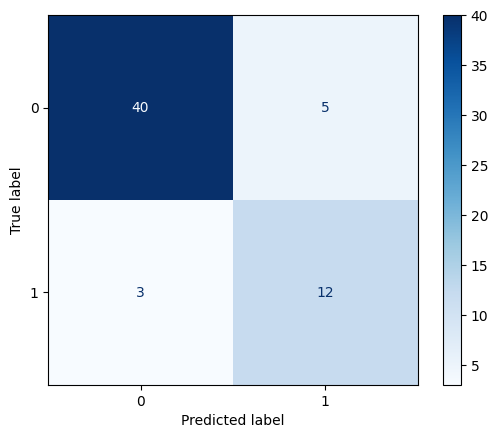

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Calcular la curva ROC
y_prob = model.predict_proba(X_test)[:, 1] # predict_proba() devuelve las probabilidades para la clase positiva 1.
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Área bajo la curva = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Especificidad')
plt.ylabel('Sensibilidad')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()